In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import struct
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import os

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
label = []
path = []
fishes = '/kaggle/input/a-large-scale-fish-dataset'
for dir_name, _, filenames in os.walk(fishes):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.png':
            if dir_name.split()[-1]!='GT':
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name, filename))
                
        
data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label
        

In [10]:
data.shape

(9281, 2)

In [4]:
data.head(15) 

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
1,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
2,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
3,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
4,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
5,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
6,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
7,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
8,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
9,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat


In [5]:
display(data)

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
1,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
2,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
3,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
4,/kaggle/input/a-large-scale-fish-dataset/NA_Fi...,Black Sea Sprat
...,...,...
9276,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
9277,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
9278,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
9279,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


In [9]:
data.info

<bound method DataFrame.info of                                                    path            label
0     /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
1     /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
2     /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
3     /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
4     /kaggle/input/a-large-scale-fish-dataset/NA_Fi...  Black Sea Sprat
...                                                 ...              ...
9276  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
9277  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
9278  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
9279  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
9280  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream

[9281 rows x 2 columns]>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9281 entries, 0 to 9280
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9281 non-null   object
 1   label   9281 non-null   object
dtypes: object(2)
memory usage: 145.1+ KB


In [11]:
data.isnull().sum()

path     0
label    0
dtype: int64

In [12]:
data['label'].unique()

array(['Black Sea Sprat', 'Red Mullet', 'Trout', 'Striped Red Mullet',
       'Shrimp', 'Horse Mackerel', 'Gilt Head Bream', 'Hourse Mackerel',
       'Sea Bass', 'Gilt-Head Bream', 'Red Sea Bream'], dtype=object)

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(df, target_size=(28, 28)):
    images = []
    labels = []
    for index, row in df.iterrows():
        img = load_img(row['path'], target_size=target_size)
        img = img_to_array(img)
        img = img / 255.0  # Normalizasyon
        images.append(img)
        labels.append(row['label'])
    return np.array(images), np.array(labels)  

In [17]:
X, y = load_images(data)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (7424, 28, 28, 3)
X_test shape: (1857, 28, 28, 3)
y_train shape: (7424,)
y_test shape: (1857,)


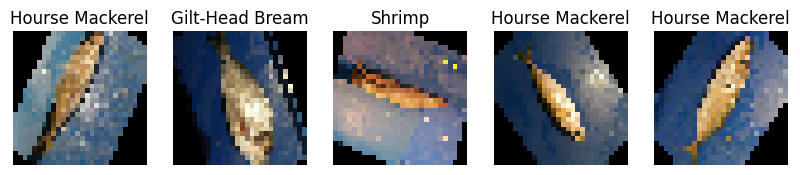

In [23]:
def plot_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'{labels[i]}')
        plt.axis('off')
    plt.show()
    
plot_images(X_train, y_train, num_images=5)  

In [24]:
# X_train dizisi (7424, 28, 28, 3) boyutunda
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 3)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 3)).astype('float32') / 255


print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (7424, 2352)
X_test shape: (1857, 2352)


In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [26]:
print('y_train shape:', y_train.shape)
print('y_train sample:', y_train[:5])

print('y_val shape:', y_train.shape)
print('y_val sample:', y_val[:5])

print('y_test shape:', y_train.shape)
print('y_test sample:', y_test[:5])

y_train shape: (5939,)
y_train sample: ['Red Sea Bream' 'Black Sea Sprat' 'Trout' 'Gilt-Head Bream' 'Sea Bass']
y_val shape: (5939,)
y_val sample: ['Gilt-Head Bream' 'Shrimp' 'Gilt-Head Bream' 'Shrimp' 'Red Mullet']
y_test shape: (5939,)
y_test sample: ['Black Sea Sprat' 'Trout' 'Red Mullet' 'Shrimp' 'Hourse Mackerel']


In [28]:
y_train = np.where(y_train == 'Gilt Head Bream', 'Gilt-Head Bream', y_train)
y_val = np.where(y_val == 'Gilt Head Bream', 'Gilt-Head Bream', y_val)
y_test = np.where(y_test == 'Gilt Head Bream', 'Gilt-Head Bream', y_test)

In [29]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Label encoding işlemi
label_encoder = LabelEncoder()

# Y_train, Y_val ve Y_test için label encoding uygulanması
y_train_encoded = label_encoder.fit_transform(y_train)  
y_val_encoded = label_encoder.transform(y_val)          
y_test_encoded = label_encoder.transform(y_test)        

# One-hot encoding işlemi
y_train = tf.keras.utils.to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_val = tf.keras.utils.to_categorical(y_val_encoded, num_classes=len(label_encoder.classes_))
y_test = tf.keras.utils.to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

# Yeni boyutların kontrolü
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

# Örnekler
print('y_train sample:', y_train[:5])
print('y_val sample:', y_val[:5])
print('y_test sample:', y_test[:5])

print(type(y_train))
print(type(y_val))
print(type(y_test))

y_train shape: (5939, 10)
y_val shape: (1485, 10)
y_test shape: (1857, 10)
y_train sample: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
y_val sample: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
y_test sample: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [30]:
model = tf.keras.models.Sequential()

In [31]:
# Input nesnesi
model.add(tf.keras.layers.Input(shape=(28 * 28 * 3,)))

# Input katmanı
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

In [32]:
#Hidden Layer 1
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.4))

#Hidden Layer 2
model.add(tf.keras.layers.Dense(256, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.4))

#Hidden Layer 3
model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.4))

In [33]:
# Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [34]:
# Modelin derlenmesi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
results = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50


I0000 00:00:1729782781.997317     219 service.cc:145] XLA service 0x7a549c00c750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729782781.997365     219 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


42/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1159 - loss: 2.2776

I0000 00:00:1729782787.980291     219 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.1154 - loss: 2.2750 - val_accuracy: 0.1064 - val_loss: 2.2162
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1318 - loss: 2.2059 - val_accuracy: 0.1953 - val_loss: 2.0447
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2182 - loss: 2.0048 - val_accuracy: 0.2539 - val_loss: 1.8968
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2527 - loss: 1.8999 - val_accuracy: 0.3374 - val_loss: 1.7389
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3109 - loss: 1.7581 - val_accuracy: 0.3293 - val_loss: 1.7341
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3235 - loss: 1.7239 - val_accuracy: 0.4067 - val_loss: 1.5099
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3955 - loss: 1.5709 - val_accuracy: 0.4013 - val_loss: 1.5362
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4129 - loss: 1.5209 - val_accuracy: 0.4525 - val_loss: 1.3974


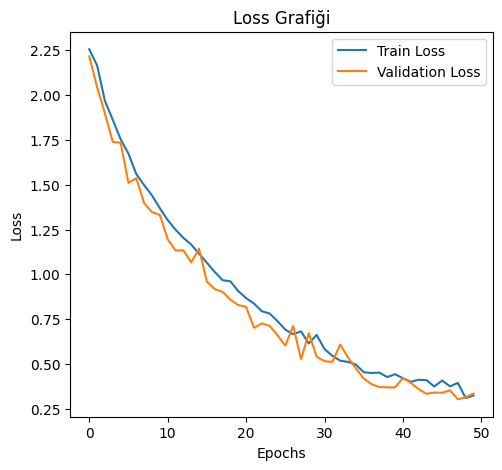

In [36]:
plt.figure(figsize=(12, 5))

# Loss grafiği
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

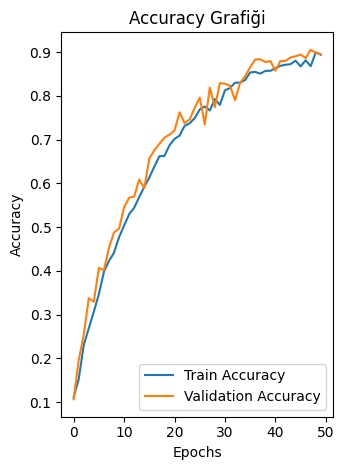

In [37]:
# Accuracy grafiği
plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [39]:
#Modelin değerlendirilmesi
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 0.3849232494831085
Test Accuracy: 0.8836833834648132
